<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</center></font>
<center><font size=6> Neural Networks and Computer Vision</center></font>

<center><img src="https://cdn.pixabay.com/photo/2020/04/06/11/22/seedling-5009286_1280.jpg" width="1300" height="500"></center>

<center><font size=6>Plant Seedling Classification</center></font>

# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
(1) With Helmet: Workers wearing safety helmets. 
(2) Without Helmet: Workers not wearing safety helmets.t.

## **Data Description**

The dataset consists of 631 images, equally divided into two categories:
- With Helmet: 311 images showing workers wearing helmets.
- Without Helmet: 320 images showing workers not wearing helmets.

The data file names are:
- images.npy
- Labels.csv

Dataset Characteristics:
Variations in Conditions: Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
Worker Activities: Workers are depicted in different actions, such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [74]:
#!pip install tensorflow[and-cuda] numpy -q

In [75]:
import tensorflow as tf

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 0
2.18.1


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [77]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                 # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop                                               # Importing the optimizers which can be used in our model
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_class_weight                                      # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                                       # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
#from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print('All Libraries Imported Successfully')

All Libraries Imported Successfully


In [78]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


## Loading the data

In [81]:
# Uncomment and run the following code in case Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [82]:
# Load the image file of the dataset

image_path = os.getcwd() + '\\images.npy'
label_path = os.getcwd() + '\\Labels.csv'

images = np.load(image_path)

# Load the labels file of the dataset
labels = pd.read_csv(label_path)
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   631 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [83]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


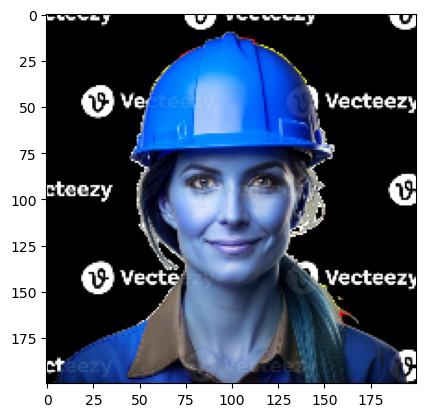

In [84]:
plt.imshow(images[111])

# **Exploratory Data Analysis**

## Plot random images from each of the classes

### Converting the BGR Images to RGB Images

In [88]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

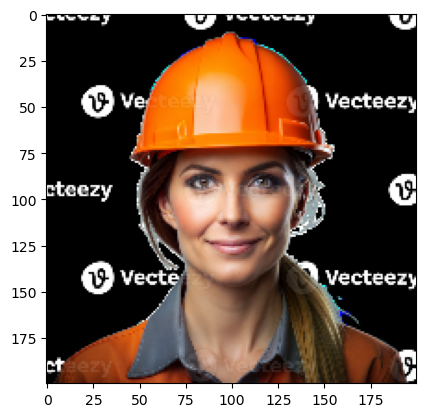

In [89]:
plt.imshow(images[111])

In [90]:
def plot_images(images,labels):
  num_classes=2                                                                   # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

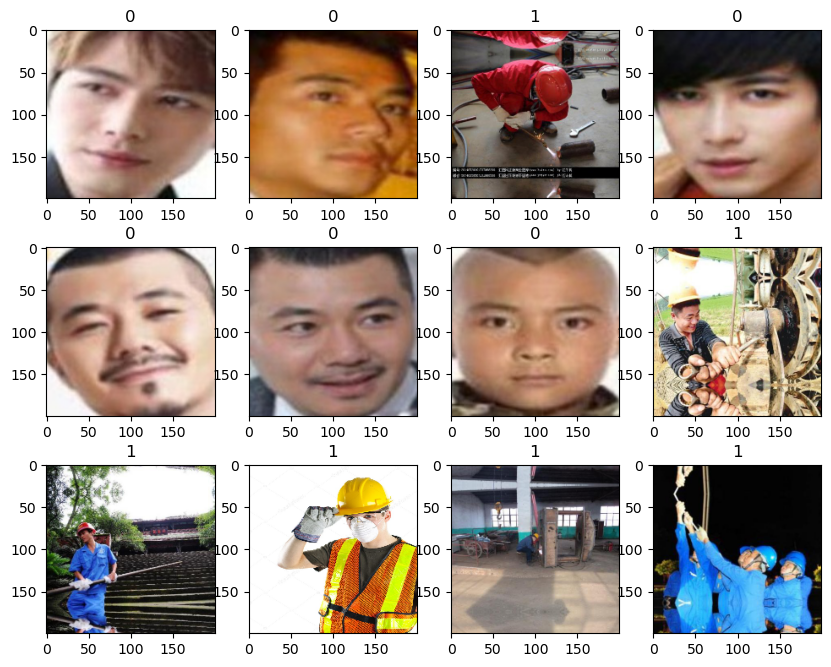

In [91]:
plot_images(images,labels)

## Checking for class imbalance


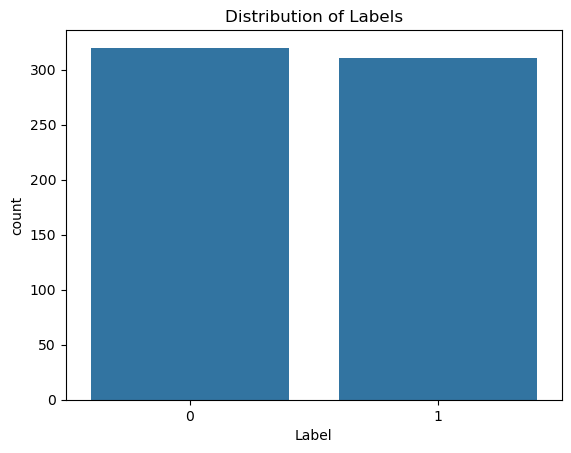

Label
0    320
1    311
Name: count, dtype: int64

In [93]:
sns.countplot(data=labels, x='Label')
plt.title('Distribution of Labels')
plt.show()
#sns.countplot(labels['Label'])
labels.groupby('Label').value_counts()

-  As you can see from the above plot, the dataset is quite balanced.
-  There are about 310 images in each categoryy

# **Data Preprocessing**

In [96]:
def grid_plot(image1, image2, gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the first image
    axes[0].imshow(image1, cmap='gray' if gray else None)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Display the second image
    axes[1].imshow(image2, cmap='gray' if gray else None)
    axes[1].set_title("Preprocessed Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

## Resizing Images

As the size of some of the images might be large, it may be computationally expensive to train on these larger images.

Let's resize all the images to 200 x 200 to ensure consistency and smooth training.

In [99]:
# We are skipping the step, considering the computing power of the system

#images_decreased=[]
#height = 128
#width = 128
#dimensions = (width, height)
#for i in range(len(images)):
#  images_decreased.append(_______))  ## Complete the code to resize the images

In [100]:
#plt.imshow(images_decreased[8])

## Apply Image Preprocessing Techniques

### Grayscale

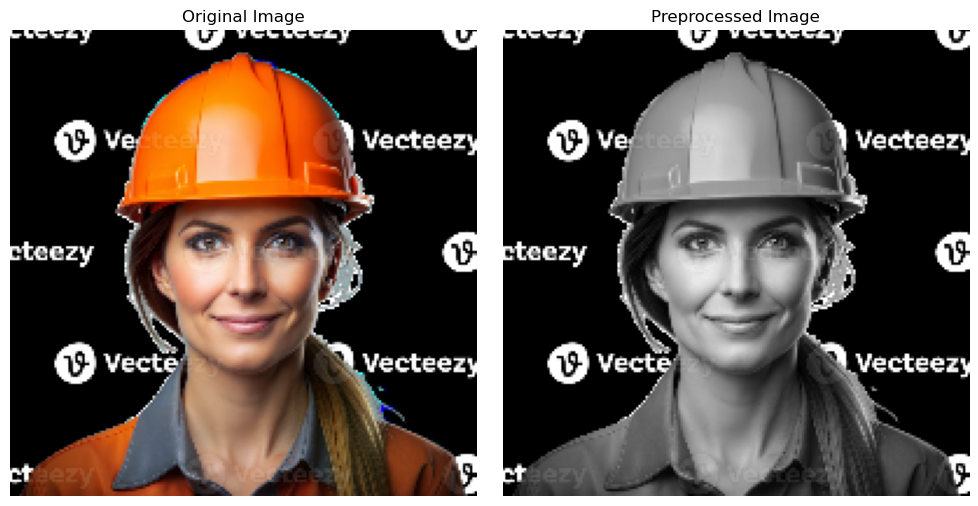

In [103]:
gray_images = []
for i in range(len(images)):
  gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

# choosing an image
n = 111
# plotting the original and preprocessed image
grid_plot(images[n],gray_images[n],gray=True)

### Gaussian Blur

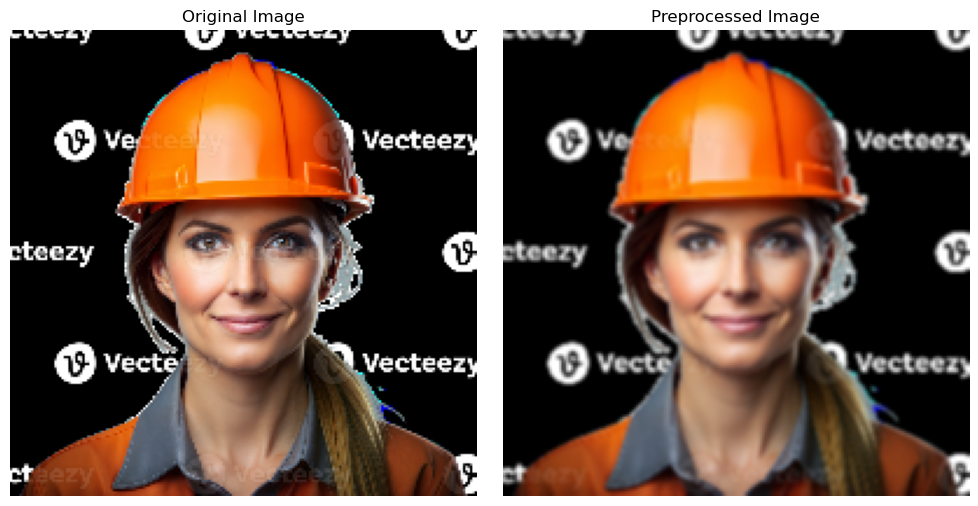

In [105]:
gaus_blur_images = []
for i in range(len(images)):
  gaus_blur_images.append(cv2.GaussianBlur(images[i], (3,3), 0))

# choosing an image
n = 111
# plotting the original and preprocessed image
grid_plot(images[n],gaus_blur_images[n])

### Laplacian Filter

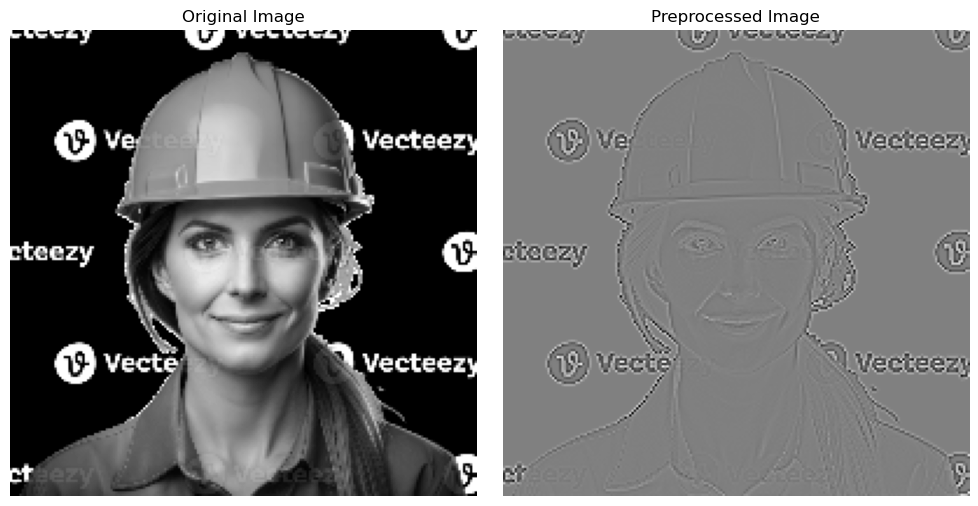

In [107]:
edge_images = []
for i in range(len(gray_images)):
    edge_images.append(cv2.Laplacian(gray_images[i],cv2.CV_64F))

# choosing an image
n = 111
# plotting the original and preprocessed image
grid_plot(gray_images[n],edge_images[n],gray=True)

## Splitting the Dataset (Original Images)



- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [110]:
from sklearn.model_selection import train_test_split

## Split the data in 80:20 ratio
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images), labels, test_size=0.2, random_state=42,stratify=labels)

## Split the Temp data in 50:50 ratio
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [111]:
print('X_train Shape:',X_train.shape,'| y_train Shape:',y_train.shape)
print('X_val Shape:',X_val.shape,'| y_val Shape:',y_val.shape)
print('X_test Shape:',X_test.shape,'| y_test Shape:',y_test.shape)

X_train Shape: (504, 200, 200, 3) | y_train Shape: (504, 1)
X_val Shape: (63, 200, 200, 3) | y_val Shape: (63, 1)
X_test Shape: (64, 200, 200, 3) | y_test Shape: (64, 1)


## Splitting the Dataset (Preprocessed Images)

In [113]:
# Grayscale
X_train_gray, X_temp_gray, y_train_gray, y_temp_gray = train_test_split(np.array(gray_images), labels, test_size=0.2, random_state=42,stratify=labels)
X_val_gray, X_test_gray, y_val_gray, y_test_gray = train_test_split(X_temp_gray, y_temp_gray, test_size=0.5, random_state=42,stratify=y_temp)

# Gaussian Blur
X_train_blur, X_temp_blur, y_train_blur, y_temp_blur = train_test_split(np.array(gaus_blur_images), labels, test_size=0.2, random_state=42,stratify=labels)
X_val_blur, X_test_blur, y_val_blur, y_test_blur = train_test_split(X_temp_blur,y_temp_blur,test_size=0.5, random_state=42,stratify=y_temp_blur)

# Laplacian Filter
X_train_edge, X_temp_edge, y_train_edge, y_temp_edge = train_test_split(np.array(edge_images), labels, test_size=0.2, random_state=42,stratify=labels)
X_val_edge, X_test_edge, y_val_edge, y_test_edge = train_test_split(X_temp_edge,y_temp_edge,test_size=0.5, random_state=42,stratify=y_temp_edge)

In [114]:
print('X_train_gray Shape:',X_train_gray.shape,'| y_train_gray Shape:',y_train_gray.shape)
print('X_val_gray Shape:',X_val_gray.shape,'| y_val_gray Shape:',y_val_gray.shape)
print('X_test_gray Shape:',X_test_gray.shape,'| y_test_gray Shape:',y_test_gray.shape)

print('X_train_blur Shape:',X_train_blur.shape,'| y_train_blur Shape:',y_train_blur.shape)
print('X_val_blur Shape:',X_val_blur.shape,'| y_val_blur Shape:',y_val_blur.shape)
print('X_test_blur Shape:',X_test_blur.shape,'| y_test_blur Shape:',y_test_blur.shape)

print('X_train_edge Shape:',X_train_edge.shape,'| y_train_edge Shape:',y_train_edge.shape)
print('X_val_edge Shape:',X_val_edge.shape,'| y_val_edge Shape:',y_val_edge.shape)
print('X_test_edge Shape:',X_test_edge.shape,'| y_test_edge Shape:',y_test_edge.shape)

X_train_gray Shape: (504, 200, 200) | y_train_gray Shape: (504, 1)
X_val_gray Shape: (63, 200, 200) | y_val_gray Shape: (63, 1)
X_test_gray Shape: (64, 200, 200) | y_test_gray Shape: (64, 1)
X_train_blur Shape: (504, 200, 200, 3) | y_train_blur Shape: (504, 1)
X_val_blur Shape: (63, 200, 200, 3) | y_val_blur Shape: (63, 1)
X_test_blur Shape: (64, 200, 200, 3) | y_test_blur Shape: (64, 1)
X_train_edge Shape: (504, 200, 200) | y_train_edge Shape: (504, 1)
X_val_edge Shape: (63, 200, 200) | y_val_edge Shape: (63, 1)
X_test_edge Shape: (64, 200, 200) | y_test_edge Shape: (64, 1)


## Encoding the Target Variable

- Convert labels from names to one hot vectors.
- We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called LabelBinarizer.
- LabelBinarizer works similar to onehotencoder

In [117]:
## Original Dataset
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [118]:
#shape of the encoded data - Original
print('Shape of Encoded Target Variable (Original Dataset):')
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

Shape of Encoded Target Variable (Original Dataset):


((504, 1), (63, 1), (64, 1))

In [119]:
## Preprocessed Dataset - Grayscale
y_train_gray_encoded = enc.fit_transform(y_train_gray)
y_val_gray_encoded=enc.transform(y_val_gray)
y_test_gray_encoded=enc.transform(y_test_gray)

## Preprocessed Dataset - Gaussian Blur
y_train_blur_encoded = enc.fit_transform(y_train_blur)
y_val_blur_encoded=enc.transform(y_val_blur)
y_test_blur_gray_encoded=enc.transform(y_test_blur)

## Preprocessed Dataset - Laplacian Filter
y_train_edge_encoded = enc.fit_transform(y_train_edge)
y_val_edge_blur_encoded=enc.transform(y_val_edge)
y_test_edge_blur_gray_encoded=enc.transform(y_test_edge)

In [120]:
#shape of the encoded data - Grayscale
print('Shape of Encoded Target Variable (Grayscale Dataset):')
y_train_gray_encoded.shape, y_val_gray_encoded.shape, y_test_gray_encoded.shape

Shape of Encoded Target Variable (Grayscale Dataset):


((504, 1), (63, 1), (64, 1))

In [121]:
#shape of the encoded data - Gaussian Blur
print('Shape of Encoded Target Variable (Gaussian Blur Dataset):')
y_train_blur_encoded.shape, y_val_blur_encoded.shape, y_test_blur_gray_encoded.shape

Shape of Encoded Target Variable (Gaussian Blur Dataset):


((504, 1), (63, 1), (64, 1))

In [122]:
#shape of the encoded data - Laplacian Filter
print('Shape of Encoded Target Variable (Laplacian Filter Dataset):')
y_train_edge_encoded.shape, y_val_edge_blur_encoded.shape, y_test_edge_blur_gray_encoded.shape

Shape of Encoded Target Variable (Laplacian Filter Dataset):


((504, 1), (63, 1), (64, 1))

## Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [145]:
# Normalizing the image pixels - Original
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# Normalizing the image pixels - Grayscale
X_train_gray_normalized = X_train_gray.astype('float32')/255.0
X_val_gray_normalized = X_val_gray.astype('float32')/255.0
X_test_gray_normalized = X_test_gray.astype('float32')/255.0

# Normalizing the image pixels - Gaussian Blur
X_train_blur_normalized = X_train_blur.astype('float32')/255.0
X_val_blur_normalized = X_val_blur.astype('float32')/255.0
X_test_blur_normalized = X_test_blur.astype('float32')/255.0

# Normalizing the image pixels - Laplacian Filter
X_train_edge_normalized = X_train_edge.astype('float32')/255.0
X_val_edge_normalized = X_val_edge.astype('float32')/255.0
X_test_edge_normalized = X_test_edge.astype('float32')/255

print('X_train\n',X_train)
print('X_train_normalized\n',X_train_normalized)

X_train
 [[[[ 92  91  97]
   [ 89  88  93]
   [ 54  54  59]
   ...
   [219 217 205]
   [225 224 212]
   [239 239 225]]

  [[100  98 105]
   [ 89  88  93]
   [ 52  51  56]
   ...
   [ 81  72  63]
   [ 81  72  61]
   [ 96  87  77]]

  [[ 95  95 100]
   [ 91  91  96]
   [ 51  50  55]
   ...
   [ 62  48  39]
   [ 64  49  41]
   [ 64  49  40]]

  ...

  [[123 123 118]
   [ 67  67  62]
   [ 90  89  85]
   ...
   [ 62  57  53]
   [ 65  60  50]
   [ 68  65  50]]

  [[ 87  86  82]
   [ 63  62  58]
   [ 94  93  89]
   ...
   [ 56  50  46]
   [ 63  55  46]
   [ 86  78  65]]

  [[117 116 112]
   [ 70  69  65]
   [112 111 107]
   ...
   [ 57  48  45]
   [ 64  54  46]
   [ 95  85  73]]]


 [[[ 77 103 162]
   [ 77 103 162]
   [ 78 104 163]
   ...
   [209 214 233]
   [208 214 233]
   [208 213 232]]

  [[ 76 102 161]
   [ 77 103 162]
   [ 78 104 163]
   ...
   [209 214 233]
   [208 213 232]
   [207 212 231]]

  [[ 76 102 161]
   [ 76 102 161]
   [ 77 103 162]
   ...
   [207 214 232]
   [206 213 231]
  

# **Model Building**

## Model Evaluation Criterion

Define the Model Evaluation Criterion:

-  Prevent false negatives, i.e., workers without helmets being incorrectly classified as with helmets; because, this could lead to safety violations and injuries.
-  Accuracy: Proportion of correctly classified images (both “With Helmet” and “Without Helmet”) out of all images evaluated. measures how well the model identifies both safe (helmeted) and unsafe (helmetless) workers overall. It gives a broad snapshot of performance
-  Recall: Measures the ability to correctly detect violations. High recall ensures few helmetless workers are missed.
-  F1-Score: Balances recall and precision, especially important if you're optimizing both safety and operational efficiency.
-  Precision: Ensures that detected violations are indeed true — avoids unnecessary escalations or interruptions.

-  Primary Metric: Recall, as this measures how well the system detects actual violations (i.e., workers not wearing helmets)
-  Secondary Metric: Accuracy, as this tells how well the model performs overall. Dataset is almost balanced (311 with helmets, 320 without), so accuracy is not misleading by itself & it gives a quick snapshot of overall model performance

## Utility Functions

In [206]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Get predicted probabilities for each class
    y_pred_probs = model.predict(predictors)

    # Get predicted class labels (argmax of probabilities)
    #y_pred = np.argmax(y_pred_probs, axis=1)                              # In Case of Multi-classification | Softmax Activation
    y_pred = (y_pred_probs > 0.5).astype(int)                              # In Case of Binary classification | Sigmoid Activation
    
    # Get true class labels
    #y_true = np.argmax(target, axis=1)                                    # In Case of Multi-classification | Softmax Activation
    y_true = target                                                        # In Case of Binary classification | Sigmoid Activation

    # Calculate weighted metrics for all classes combined
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Create a dictionary of metrics
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Create a DataFrame from the metrics dictionary
    df_perf = pd.DataFrame(metrics, index=[0])

    return df_perf

In [234]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # Get predicted probabilities for each class
    y_pred_probs = model.predict(predictors)

    # Get predicted class labels (argmax of probabilities)
    #y_pred = np.argmax(y_pred_probs, axis=1)                              # In Case of Multi-classification | Softmax Activation
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()                    # In Case of Binary classification | Sigmoid Activation
    
    # Get true class labels
    #y_true = np.argmax(target, axis=1)                                    # In Case of Multi-classification | Softmax Activation
    y_true = target                                                        # In Case of Binary classification | Sigmoid Activation
    
    
#   y_pred = model.predict(predictors)
#   y_pred_arg = np.argmax(y_pred, axis=1)
#   y_val_arg = np.argmax(target, axis=1)

    confusion_matrix = tf.math.confusion_matrix(y_true,y_pred)
    f, ax = plt.subplots(figsize=(6, 6))
  
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    # Setting the labels to both the axes
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
    ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
    plt.show()

## Model 1: Simple ANN with Image Flattening

In [114]:
num_classes = labels['Label'].nunique()
image_size = X_train_normalized[0].size
shape = X_train_normalized.shape[1:]

print('Model 1 Image Input Characteristics:\n')
print('No. of Classes:',num_classes)
print('Image Size:',image_size)
print('Image Input Shape:',shape)

Model 1 Image Input Characteristics:

No. of Classes: 2
Image Size: 120000
Image Input Shape: (200, 200, 3)


In [184]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

# Initializing Model
model_1 = Sequential()

# Flatten the image
model_1.add(Flatten(input_shape=(shape[0], shape[1], shape[2])))

# Adding dense layer
model_1.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(1, activation='sigmoid')) # Output Layer for Binary Classification

# Compiling Model
opt = Adam()
model_1.compile(optimizer=opt,loss = 'binary_crossentropy', metrics=['accuracy'])

# Summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 120000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      30,720,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,761,473 (117.35 MB)

 Trainable params: 30,761,473 (117.35 MB)

 Non-trainable params: 0 (0.00 B)

In [186]:
# Calculate class weights to address class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train['Label']),  # Assuming y_train is a pandas Series or DataFrame
    y=y_train['Label']
)

class_weights_dict = dict(enumerate(class_weights))
print('Class Weights:',class_weights_dict)

Class Weights: {0: 0.984375, 1: 1.0161290322580645}


In [188]:
%%time
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            class_weight = class_weights_dict,  # Using the computed class weights dictionary to deal with data imbalance
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            shuffle=True,
            batch_size=32,
            verbose=1
)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.5460 - loss: 25.2606 - val_accuracy: 0.6190 - val_loss: 4.3637
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.8271 - loss: 1.4546 - val_accuracy: 0.8571 - val_loss: 0.5366
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.8088 - loss: 1.2907 - val_accuracy: 0.7778 - val_loss: 1.8123
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.7862 - loss: 2.1725 - val_accuracy: 0.8254 - val_loss: 1.6255
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.8504 - loss: 1.5604 - val_accuracy: 0.7619 - val_loss: 2.6149
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.8296 - loss: 1.6124 - val_accuracy: 0.8413 - val_loss: 0.9550
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.7901 - loss: 2.5852 - val_accuracy: 0.8413 - val_loss: 1.9838
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.8763 - loss: 1.4447 - val_accuracy: 0

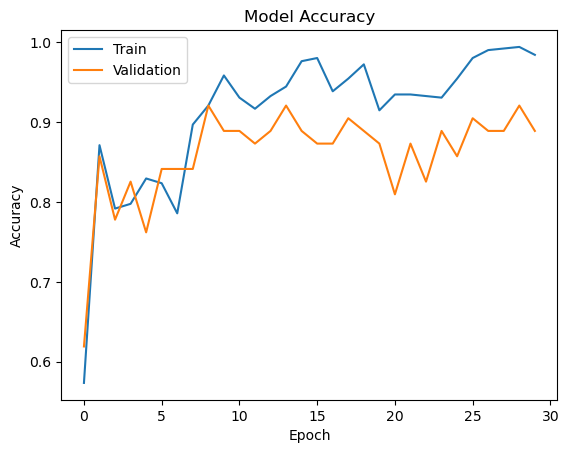

In [189]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [204]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized, y_train_encoded)

print("Train performance metrics")
model_1_train_perf

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Train performance metrics


Accuracy  Precision    Recall  F1 Score
0  0.998016   0.998024  0.998016  0.998016

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


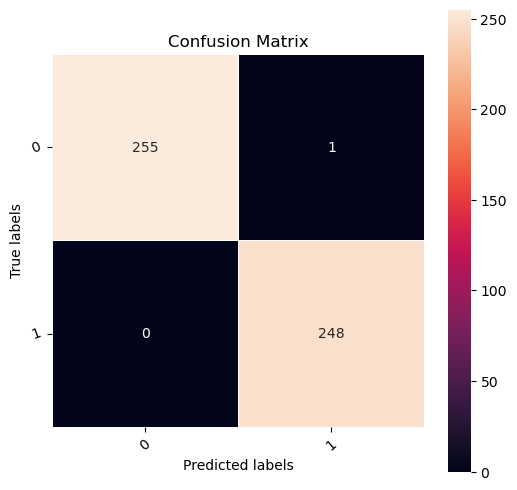

In [236]:
plot_confusion_matrix(model_1,X_train_normalized,y_train_encoded)

In [500]:
model_1_val_perf = model_performance_classification(model_1, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
model_1_val_perf

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Validation performance metrics


Accuracy  Precision    Recall  F1 Score
0  0.888889   0.908832  0.888889  0.887295

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


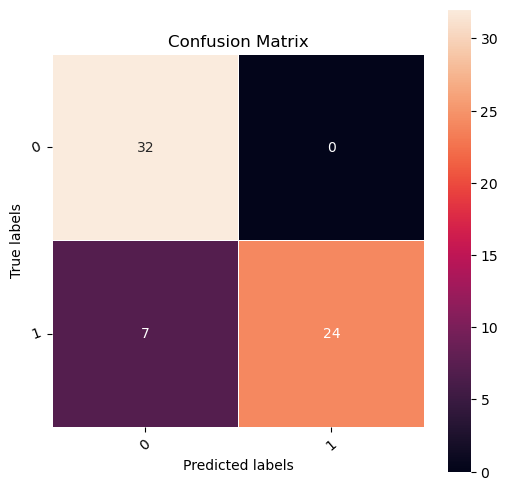

In [240]:
plot_confusion_matrix(model_1,X_val_normalized,y_val_encoded)

### Visualizing the predictions

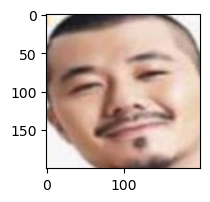

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted Label [0]
True Label 0


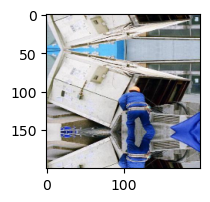

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Label [1]
True Label 1


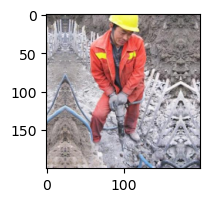

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Label [1]
True Label 1


In [402]:
# Visualizing the predicted and correct label of images from test data
i1 = 2
i2 = 21
i3 = 50

plt.figure(figsize=(2,2))
plt.imshow(X_val[i1])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[i1].reshape(1,200,200,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i1])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[i2].reshape(1,200,200,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i2])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i3])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[i3].reshape(1,200,200,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i3])                                              # using inverse_transform() to get the output label from the output vector

## Model 2: Simple ANN with preprocessed images (Grayscale) and Image Flattening

In [332]:
# Add extra channel dimension to Grayscale image data. NN models would require the channel dimension as input
X_train_gray_normalized_dims = np.expand_dims(X_train_gray_normalized,axis=-1)

num_classes = labels['Label'].nunique()
image_size = X_train_gray_normalized_dims[0].size
shape = X_train_gray_normalized_dims.shape[1:]

print('Model 2 Image Input Characteristics:\n')
print('No. of Classes:',num_classes)
print('Image Size:',image_size)
print('Image Input Shape:',shape)

X_train_gray_normalized_dims.shape

Model 2 Image Input Characteristics:

No. of Classes: 2
Image Size: 40000
Image Input Shape: (200, 200, 1)


(504, 200, 200, 1)

In [344]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

# Initializing Model
model_2 = Sequential()

# Flatten the image
model_2.add(Flatten(input_shape=(shape[0], shape[1], shape[2])))

# Adding dense layer
model_2.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(1, activation='sigmoid'))                                 # Output Layer for Binary Classification

# Compiling Model
opt = Adam()
model_2.compile(optimizer=opt,loss = 'binary_crossentropy', metrics=['accuracy'])

# Summary
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      10,240,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,281,473 (39.22 MB)

 Trainable params: 10,281,473 (39.22 MB)

 Non-trainable params: 0 (0.00 B)

In [350]:
%%time
history_2 = model_2.fit(
            X_train_gray_normalized_dims, y_train_gray_encoded,
            class_weight = class_weights_dict,                  # Using the computed class weights dictionary to deal with data imbalance
            epochs=30,
            validation_data=(X_val_gray_normalized, y_val_gray_encoded),
            shuffle=True,
            batch_size=32,
            verbose=1
)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.5561 - loss: 7.9123 - val_accuracy: 0.8413 - val_loss: 0.4250
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.7618 - loss: 0.9659 - val_accuracy: 0.7619 - val_loss: 0.9483
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8452 - loss: 0.5001 - val_accuracy: 0.9206 - val_loss: 0.1667
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8498 - loss: 0.3874 - val_accuracy: 0.8571 - val_loss: 0.3671
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9121 - loss: 0.2461 - val_accuracy: 0.9206 - val_loss: 0.1439
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9188 - loss: 0.2269 - val_accuracy: 0.9048 - val_loss: 0.2068
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9211 - loss: 0.1859 - val_accuracy: 0.9206 - val_loss: 0.1345
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9419 - loss: 0.1539 - val_accuracy: 0.9206 - 

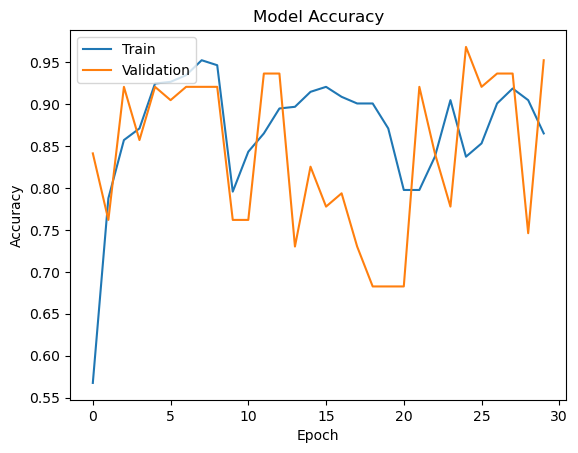

In [352]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [354]:
model_2_train_perf = model_performance_classification(model_2, X_train_gray_normalized_dims, y_train_gray_encoded)

print("Train performance metrics")
model_2_train_perf

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Train performance metrics


Accuracy  Precision    Recall  F1 Score
0  0.950397   0.952505  0.950397  0.950367

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


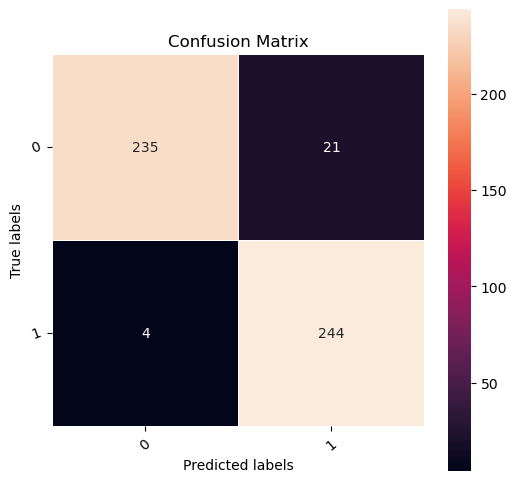

In [356]:
plot_confusion_matrix(model_2,X_train_gray_normalized_dims,y_train_gray_encoded)

In [360]:
X_val_gray_normalized_dims = np.expand_dims(X_val_gray_normalized,axis=-1)

In [502]:
model_2_val_perf = model_performance_classification(model_2, X_val_gray_normalized_dims, y_val_gray_encoded)

print("Validation performance metrics")
model_2_val_perf

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Validation performance metrics


Accuracy  Precision    Recall  F1 Score
0  0.952381   0.952861  0.952381  0.952381

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


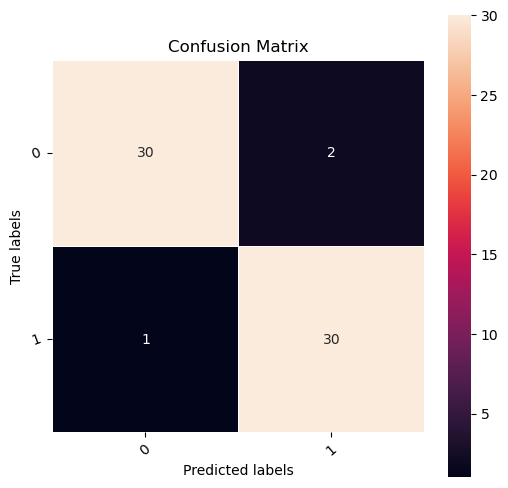

In [364]:
plot_confusion_matrix(model_2,X_val_gray_normalized_dims,y_val_gray_encoded)

### Visualizing the predictions

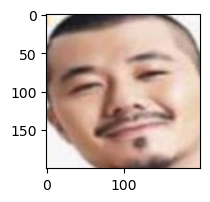

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Label [0]
True Label 0


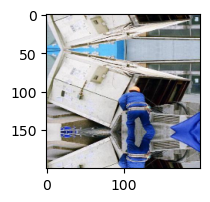

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Label [1]
True Label 1


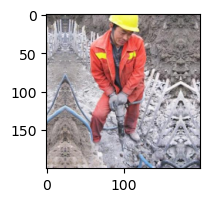

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Label [1]
True Label 1


In [400]:
# Visualizing the predicted and correct label of images from test data
i1 = 2
i2 = 21
i3 = 50

plt.figure(figsize=(2,2))
plt.imshow(X_val[i1])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_gray_normalized_dims[i1].reshape(1,200,200,1)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_gray_encoded)[i1])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_gray_normalized_dims[i2].reshape(1,200,200,1)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_gray_encoded)[i2])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i3])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_gray_normalized_dims[i3].reshape(1,200,200,1)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_gray_encoded)[i3])                                              # using inverse_transform() to get the output label from the output vector

## Model 3: Basic Convolutional Neural Network (CNN) - Original Dataset

Let's build a **CNN Model**.<br>

The model has 2 main parts:
1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers for prediction.**<br><br>





In [376]:
num_classes = labels['Label'].nunique()
image_size = X_train_normalized[0].size
shape = X_train_normalized.shape[1:]

print('Model 3 Image Input Characteristics:\n')
print('No. of Classes:',num_classes)
print('Image Size:',image_size)
print('Image Input Shape:',shape)

X_train_normalized.shape

Model 3 Image Input Characteristics:

No. of Classes: 2
Image Size: 120000
Image Input Shape: (200, 200, 3)


(504, 200, 200, 3)

In [378]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

# Initializing Model
model_3 = Sequential()

# Convolutional layers with increasing filters
model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(shape[0], shape[1], shape[2])))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))

model_3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))

model_3.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))

# Add Dropout layer for Regularization
model_3.add(Dropout(rate=0.5))

# Flatten and Dense layers
model_3.add(Flatten())

model_3.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(1, activation='sigmoid'))                                 # Output Layer for Binary Classification

# Compiling Model
opt = Adam()
model_3.compile(optimizer=opt,loss = 'binary_crossentropy', metrics=['accuracy'])

# Summary
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      20,480,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,614,721 (78.64 MB)

 Trainable params: 20,614,721 (78.64 MB)

 Non-trainable params: 0 (0.00 B)

In [380]:
%%time
history_3 = model_3.fit(
            X_train_normalized, y_train_encoded,
            class_weight = class_weights_dict,                  # Using the computed class weights dictionary to deal with data imbalance
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            shuffle=True,
            batch_size=32,
            verbose=1
)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 947ms/step - accuracy: 0.5213 - loss: 1.3630 - val_accuracy: 0.9841 - val_loss: 0.2718
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 903ms/step - accuracy: 0.9766 - loss: 0.1509 - val_accuracy: 1.0000 - val_loss: 0.0147
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 911ms/step - accuracy: 0.9945 - loss: 0.0262 - val_accuracy: 0.9524 - val_loss: 0.1052
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 898ms/step - accuracy: 0.9806 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 904ms/step - accuracy: 0.9976 - loss: 0.0067 - val_accuracy: 0.9683 - val_loss: 0.0586
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 898ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9683 - val_loss: 0.1599
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 897ms/step - accuracy: 0.9996 - loss: 0.0048 - val_accuracy: 0.9841 - val_loss: 0.1287
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 905ms/step - accuracy: 0.9938 - loss: 0.0353 - val_accu

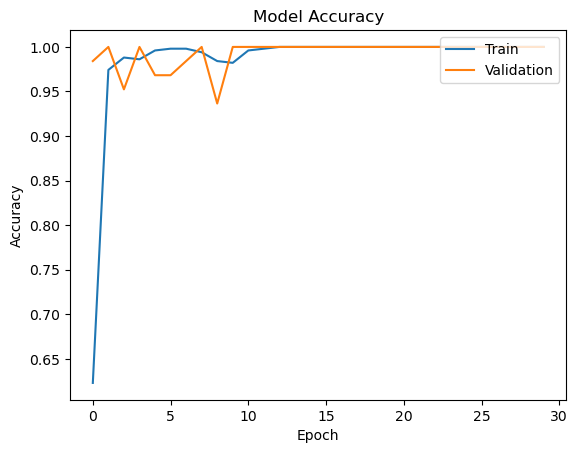

In [384]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [386]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized, y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step
Train performance metrics
   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step


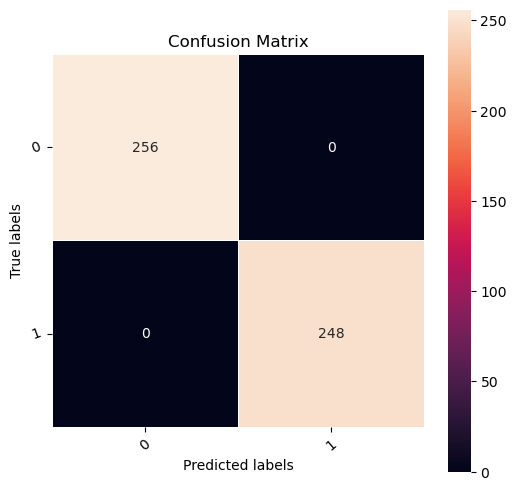

In [388]:
plot_confusion_matrix(model_3,X_train_normalized, y_train_encoded)

In [504]:
model_3_val_perf = model_performance_classification(model_3, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_3_val_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step
Validation performance metrics
   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step


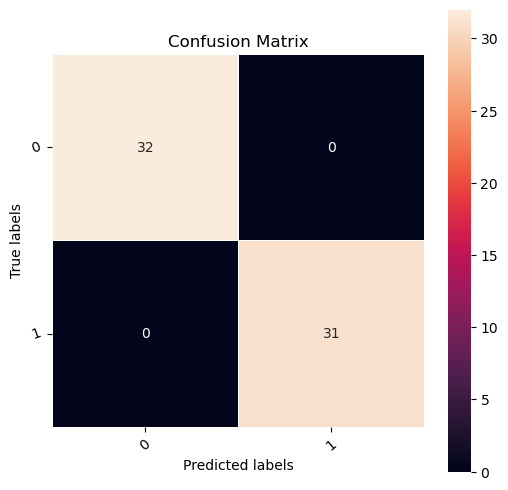

In [392]:
plot_confusion_matrix(model_3,X_val_normalized,y_val_encoded)

### Vizualizing the predictions

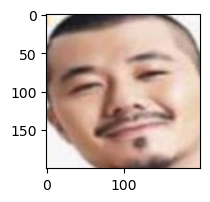

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted Label [0]
True Label 0


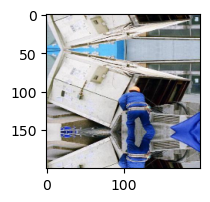

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted Label [1]
True Label 1


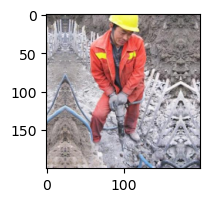

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Label [1]
True Label 1


In [404]:
# Visualizing the predicted and correct label of images from test data
i1 = 2
i2 = 21
i3 = 50

plt.figure(figsize=(2,2))
plt.imshow(X_val[i1])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[i1].reshape(1,200,200,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i1])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[i2].reshape(1,200,200,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i2])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i3])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[i3].reshape(1,200,200,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i3])                                              # using inverse_transform() to get the output label from the output vector

## Model 4: VGG-16 Model with Feed Forward Neural Network (FFNN) - Original Dataset

Let's use Transfer Learning to see if we can increase the performance of the model.

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.



In [529]:
# Resizing the images in train & validation sets to leverage VGG-16 Model that requires input image of size (224, 224, 3).

def resize_image(img, size=(224, 224)):
    return cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)

# Resize all images in the DataFrame
X_train_normalized_vgg = np.array([resize_image(img) for img in X_train_normalized])
X_val_normalized_vgg = np.array([resize_image(img) for img in X_val_normalized])
X_test_normalized_vgg = np.array([resize_image(img) for img in X_test_normalized])

print('Train dataset shape after resize:',X_val_normalized_vgg.shape)
print('Val dataset shape after resize:',X_val_normalized_vgg.shape)
print('Test dataset shape after resize:',X_test_normalized_vgg.shape)

Train dataset shape after resize: (63, 224, 224, 3)
Val dataset shape after resize: (63, 224, 224, 3)
Test dataset shape after resize: (64, 224, 224, 3)


In [449]:
num_classes = labels['Label'].nunique()
image_size = X_train_normalized_vgg[0].size
shape = X_train_normalized_vgg.shape[1:]

print('Model 4 Image Input Characteristics:\n')
print('No. of Classes:',num_classes)
print('Image Size:',image_size)
print('Image Input Shape:',shape)

X_train_normalized_vgg.shape

Model 4 Image Input Characteristics:

No. of Classes: 2
Image Size: 150528
Image Input Shape: (224, 224, 3)


(504, 224, 224, 3)

In [451]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [455]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False


for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_layer_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [457]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

model_4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_4.add(vgg_model)

# Flattening the output of the VGG16 model because it is fed into FFN
model_4.add(Flatten())

# Add Dense layers
model_4.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

# Add Dropout layer for Regularization
model_4.add(Dropout(rate=0.5))

model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(1, activation='sigmoid'))                                 # Output Layer for Binary Classification

# Compiling Model
opt = Adam()
model_4.compile(optimizer=opt,loss = 'binary_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,178,689 (80.79 MB)

 Trainable params: 6,464,001 (24.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [459]:
%%time

train_datagen = ImageDataGenerator()

history_4 = model_4.fit(train_datagen.flow(X_train_normalized_vgg, y_train_encoded,batch_size=128,seed=42,shuffle=True),
                        class_weight = class_weights_dict,
                        epochs=30,
                        batch_size=32,
                        verbose=1,
#                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                        validation_data=(X_val_normalized_vgg,y_val_encoded))

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 124s 31s/step - accuracy: 0.5722 - loss: 0.9451 - val_accuracy: 0.9524 - val_loss: 0.1955
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 118s 30s/step - accuracy: 0.9088 - loss: 0.2048 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 119s 31s/step - accuracy: 0.9876 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 6.8835e-04
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 141s 30s/step - accuracy: 0.9966 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 1.6088e-04
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 143s 31s/step - accuracy: 0.9934 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 5.7547e-06
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 118s 30s/step - accuracy: 0.9957 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 5.3116e-07
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 142s 30s/step - accuracy: 0.9963 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 2.1384e-07
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 118s 30s/step - accuracy: 1.0000 - loss: 2.6637e-04 - val_accu

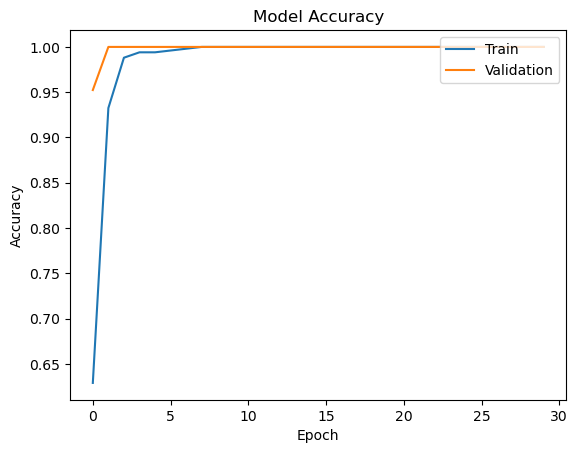

In [461]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [463]:
model_4_train_perf = model_performance_classification(model_4, X_train_normalized_vgg, y_train_encoded)

print("Train performance metrics")
print(model_4_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 104s 6s/step
Train performance metrics
   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 104s 7s/step


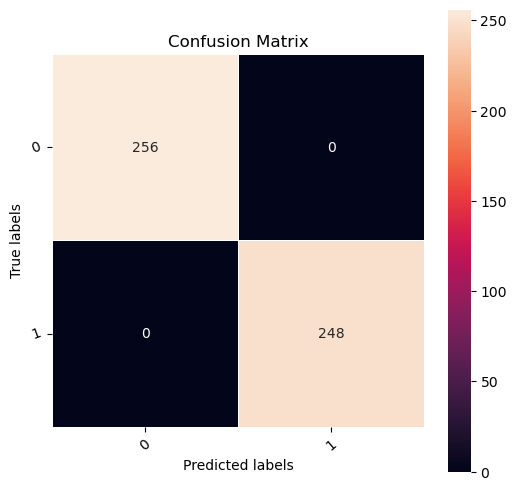

In [464]:
plot_confusion_matrix(model_4,X_train_normalized_vgg, y_train_encoded)

In [506]:
model_4_val_perf = model_performance_classification(model_4, X_val_normalized_vgg,y_val_encoded)

print("Validation performance metrics")
print(model_4_val_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step
Validation performance metrics
   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


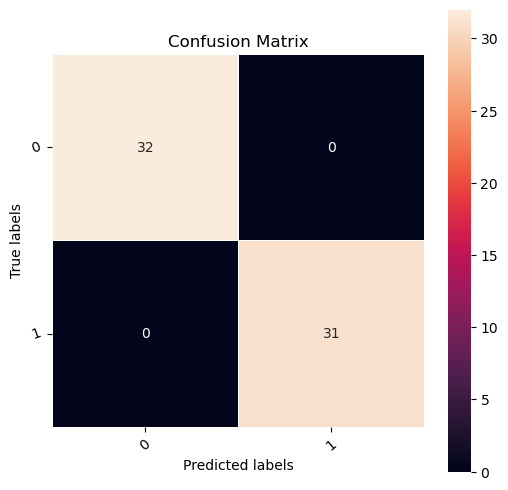

In [470]:
plot_confusion_matrix(model_4,X_val_normalized_vgg,y_val_encoded)

#### Visualizing the predictions

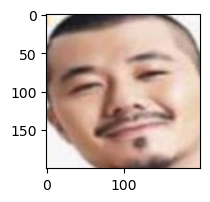

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
Predicted Label [0]
True Label 0


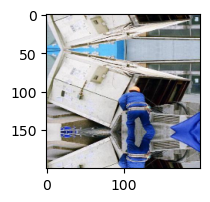

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
Predicted Label [1]
True Label 1


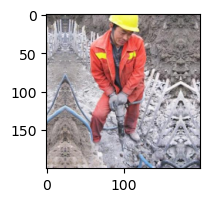

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
Predicted Label [1]
True Label 1


In [473]:
# Visualizing the predicted and correct label of images from test data
i1 = 2
i2 = 21
i3 = 50

plt.figure(figsize=(2,2))
plt.imshow(X_val[i1])
plt.show()
print('Predicted Label', enc.inverse_transform(model_4.predict((X_val_normalized_vgg[i1].reshape(1,224,224,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i1])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_4.predict((X_val_normalized_vgg[i2].reshape(1,224,224,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i2])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i3])
plt.show()
print('Predicted Label', enc.inverse_transform(model_4.predict((X_val_normalized_vgg[i3].reshape(1,224,224,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i3])                                              # using inverse_transform() to get the output label from the output vector

## Model 5: VGG-16 Model with FFNN and Data Augmentation - Original Dataset

In [476]:
num_classes = labels['Label'].nunique()
image_size = X_train_normalized_vgg[0].size
shape = X_train_normalized_vgg.shape[1:]

print('Model 5 Image Input Characteristics:\n')
print('No. of Classes:',num_classes)
print('Image Size:',image_size)
print('Image Input Shape:',shape)

X_train_normalized_vgg.shape

Model 5 Image Input Characteristics:

No. of Classes: 2
Image Size: 150528
Image Input Shape: (224, 224, 3)


(504, 224, 224, 3)

In [478]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

model_5 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_5.add(vgg_model)

# Flattening the output of the VGG16 model because it is fed into FFN
model_5.add(Flatten())

# Add Dense layers
model_5.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model_5.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

# Add Dropout layer for Regularization
model_5.add(Dropout(rate=0.5))

model_5.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_5.add(Dense(1, activation='sigmoid'))                                 # Output Layer for Binary Classification

# Compiling Model
opt = Adam()
model_5.compile(optimizer=opt,loss = 'binary_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,178,689 (80.79 MB)

 Trainable params: 6,464,001 (24.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [482]:
%%time

# Applying data augmentation
train_datagen = ImageDataGenerator(
                                    rotation_range=20,
                                    fill_mode='nearest',
                                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                                   )

history_5 = model_5.fit(train_datagen.flow(X_train_normalized_vgg, y_train_encoded,batch_size=128,seed=42,shuffle=True),
                        class_weight = class_weights_dict,
                        epochs=15,
                        batch_size=32,
                        verbose=1,
#                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                        validation_data=(X_val_normalized_vgg,y_val_encoded))

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 136s 34s/step - accuracy: 0.5191 - loss: 0.9478 - val_accuracy: 0.6984 - val_loss: 0.7171
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 130s 34s/step - accuracy: 0.8543 - loss: 0.3537 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 142s 33s/step - accuracy: 0.9519 - loss: 0.1449 - val_accuracy: 0.9841 - val_loss: 0.0383
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 129s 33s/step - accuracy: 0.9855 - loss: 0.0525 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 130s 33s/step - accuracy: 0.9887 - loss: 0.0498 - val_accuracy: 1.0000 - val_loss: 1.1661e-05
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 130s 33s/step - accuracy: 0.9971 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 2.9541e-06
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 142s 34s/step - accuracy: 0.9798 - loss: 0.0359 - val_accuracy: 1.0000 - val_loss: 4.2830e-08
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 130s 33s/step - accuracy: 0.9906 - loss: 0.0234 - val_accuracy: 1.0000

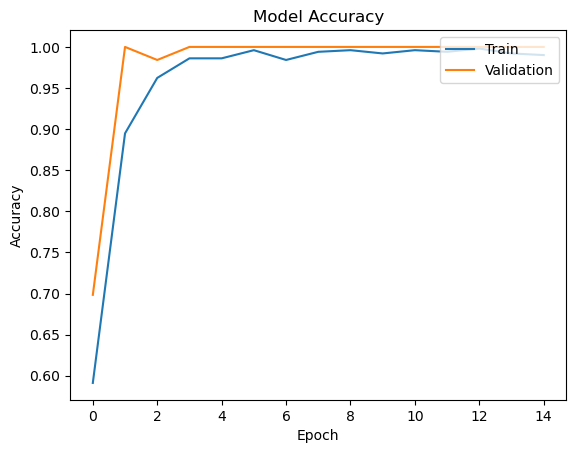

In [483]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [484]:
model_5_train_perf = model_performance_classification(model_5, X_train_normalized_vgg, y_train_encoded)

print("Train performance metrics")
print(model_5_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 106s 7s/step
Train performance metrics
   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 105s 7s/step


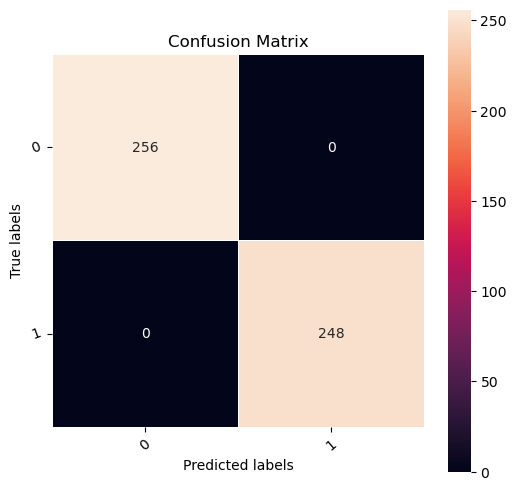

In [485]:
plot_confusion_matrix(model_5,X_train_normalized_vgg, y_train_encoded)

In [508]:
model_5_val_perf = model_performance_classification(model_5, X_val_normalized_vgg,y_val_encoded)

print("Validation performance metrics")
print(model_5_val_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step
Validation performance metrics
   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step


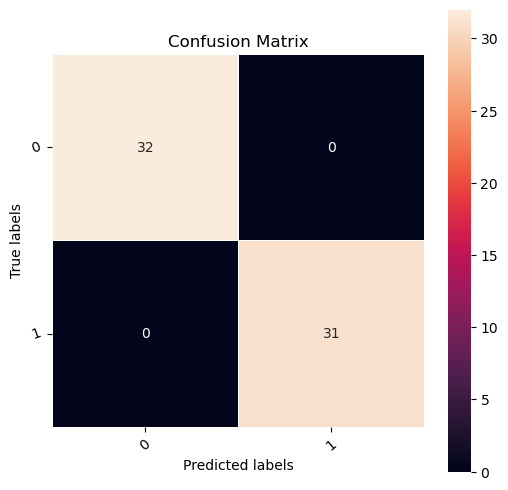

In [487]:
plot_confusion_matrix(model_4,X_val_normalized_vgg,y_val_encoded)

#### Visualizing the predictions

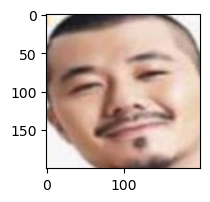

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Predicted Label [0]
True Label 0


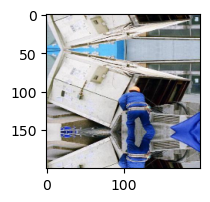

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
Predicted Label [1]
True Label 1


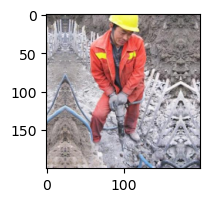

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Predicted Label [1]
True Label 1


In [488]:
# Visualizing the predicted and correct label of images from test data
i1 = 2
i2 = 21
i3 = 50

plt.figure(figsize=(2,2))
plt.imshow(X_val[i1])
plt.show()
print('Predicted Label', enc.inverse_transform(model_5.predict((X_val_normalized_vgg[i1].reshape(1,224,224,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i1])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_5.predict((X_val_normalized_vgg[i2].reshape(1,224,224,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i2])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[i3])
plt.show()
print('Predicted Label', enc.inverse_transform(model_5.predict((X_val_normalized_vgg[i3].reshape(1,224,224,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[i3])                                              # using inverse_transform() to get the output label from the output vector

# **Model Performance Comparison and Final Model Selection**

In [496]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Simple ANN with Image Flattening", 
    "Simple ANN with Preprocessed Images (Grayscale) and Image Flattening", 
    "Basic Convolutional Neural Network (CNN) - Original Images)",
    "VGG-16 Model with Feed Forward Neural Network (FFNN) - Original Images",
    "VGG-16 Model with FFNN and Data Augmentation - Original Images"
]

In [512]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Simple ANN with Image Flattening", 
    "Simple ANN with Preprocessed Images (Grayscale) and Image Flattening", 
    "Basic Convolutional Neural Network (CNN) - Original Images)",
    "VGG-16 Model with Feed Forward Neural Network (FFNN) - Original Images",
    "VGG-16 Model with FFNN and Data Augmentation - Original Images"
]

In [498]:
models_train_comp_df

Simple ANN with Image Flattening  \
Accuracy                           0.998016   
Precision                          0.998024   
Recall                             0.998016   
F1 Score                           0.998016   

           Simple ANN with Preprocessed Images (Grayscale) and Image Flattening  \
Accuracy                                            0.950397                      
Precision                                           0.952505                      
Recall                                              0.950397                      
F1 Score                                            0.950367                      

           Basic Convolutional Neural Network (CNN) - Original Images)  \
Accuracy                                                 1.0             
Precision                                                1.0             
Recall                                                   1.0             
F1 Score                                                 1.0             

           VGG-16 Model with Feed Forward Neural Network (FFNN) - Original Images  \
Accuracy                                                 1.0                        
Precision                                                1.0                        
Recall                                                   1.0                        
F1 Score                                                 1.0                        

           VGG-16 Model with FFNN and Data Augmentation - Original Images  
Accuracy                                                 1.0               
Precision                                                1.0               
Recall                                                   1.0               
F1 Score                                                 1.0

In [514]:
models_val_comp_df

Simple ANN with Image Flattening  \
Accuracy                           0.888889   
Precision                          0.908832   
Recall                             0.888889   
F1 Score                           0.887295   

           Simple ANN with Preprocessed Images (Grayscale) and Image Flattening  \
Accuracy                                            0.952381                      
Precision                                           0.952861                      
Recall                                              0.952381                      
F1 Score                                            0.952381                      

           Basic Convolutional Neural Network (CNN) - Original Images)  \
Accuracy                                                 1.0             
Precision                                                1.0             
Recall                                                   1.0             
F1 Score                                                 1.0             

           VGG-16 Model with Feed Forward Neural Network (FFNN) - Original Images  \
Accuracy                                                 1.0                        
Precision                                                1.0                        
Recall                                                   1.0                        
F1 Score                                                 1.0                        

           VGG-16 Model with FFNN and Data Augmentation - Original Images  
Accuracy                                                 1.0               
Precision                                                1.0               
Recall                                                   1.0               
F1 Score                                                 1.0

In [516]:
models_train_comp_df - models_valid_comp_df

Simple ANN with Image Flattening  \
Accuracy                           0.109127   
Precision                          0.089192   
Recall                             0.109127   
F1 Score                           0.110720   

           Simple ANN with Preprocessed Images (Grayscale) and Image Flattening  \
Accuracy                                           -0.001984                      
Precision                                          -0.000356                      
Recall                                             -0.001984                      
F1 Score                                           -0.002014                      

           Basic Convolutional Neural Network (CNN) - Original Images)  \
Accuracy                                                 0.0             
Precision                                                0.0             
Recall                                                   0.0             
F1 Score                                                 0.0             

           VGG-16 Model with Feed Forward Neural Network (FFNN) - Original Images  \
Accuracy                                                 0.0                        
Precision                                                0.0                        
Recall                                                   0.0                        
F1 Score                                                 0.0                        

           VGG-16 Model with FFNN and Data Augmentation - Original Images  
Accuracy                                                 0.0               
Precision                                                0.0               
Recall                                                   0.0               
F1 Score                                                 0.0

Observations:

-  Please refer Business Report

## Test Performance

In [533]:
test_performance_metric = model_performance_classification(model_5, X_test_normalized_vgg,y_test_encoded)

print("Test performance metrics")
test_performance_metric

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step
Test performance metrics


Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step


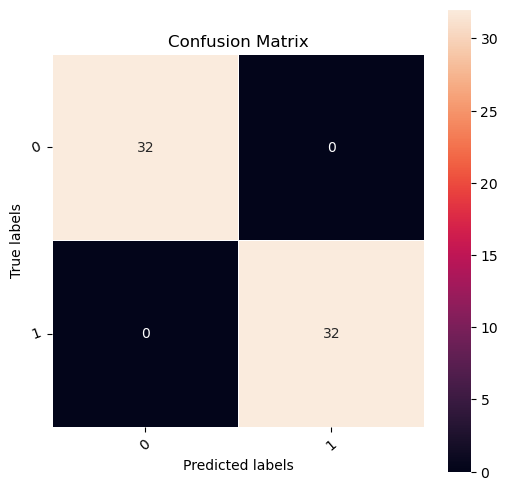

In [535]:
plot_confusion_matrix(model_5, X_test_normalized_vgg,y_test_encoded)

# **Actionable Insights & Recommendations**

-  Please refer Business Report

<font size=5 color='blue'>Power Ahead!</font>
___